In [1]:
print("Notebook is working ✅")


Notebook is working ✅


In [2]:
import pandas as pd
df = pd.read_csv('../data/merged_data.csv', index_col=0, parse_dates=True)
df.head()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_3392\3599596129.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/merged_data.csv', index_col=0, parse_dates=True)


,VIX,S&P500,Gold,Oil
Price,,,,
Ticker,^VIX,^GSPC,GC=F,CL=F
Date,NaN,NaN,NaN,NaN
2015-01-02,17.790000915527344,2058.199951171875,1186.0,52.689998626708984
2015-01-05,19.920000076293945,2020.5799560546875,1203.9000244140625,50.040000915527344
2015-01-06,21.1200008392334,2002.6099853515625,1219.300048828125,47.93000030517578


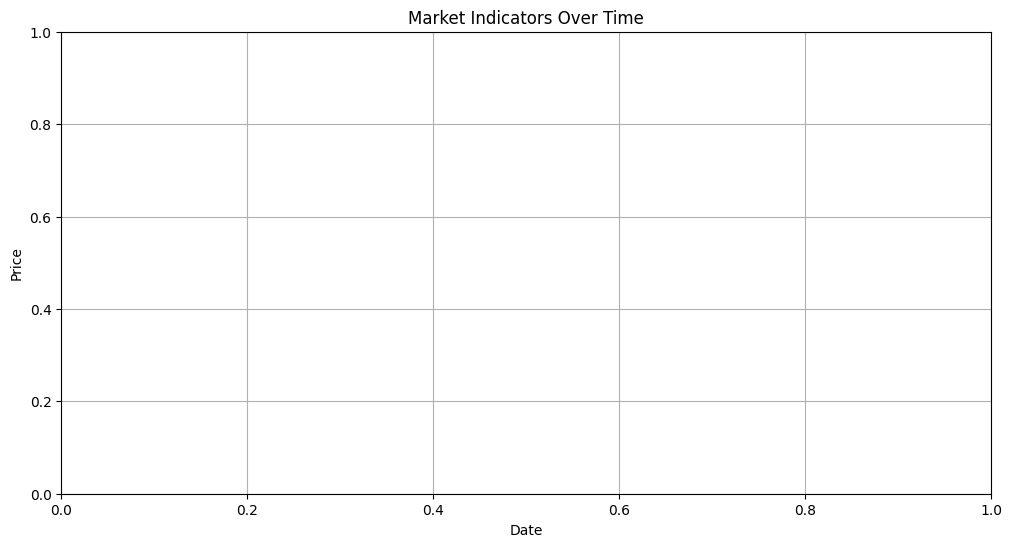

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.title("Market Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [4]:
X = df.drop(columns=['VIX'])
y = df['VIX']

In [5]:
split_index = int(0.8 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)

✅ Train shape: (2011, 3)
✅ Test shape: (503, 3)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


ValueError: could not convert string to float: '^GSPC'

In [7]:
X.head()


,S&P500,Gold,Oil
Price,,,
Ticker,^GSPC,GC=F,CL=F
Date,NaN,NaN,NaN
2015-01-02,2058.199951171875,1186.0,52.689998626708984
2015-01-05,2020.5799560546875,1203.9000244140625,50.040000915527344
2015-01-06,2002.6099853515625,1219.300048828125,47.93000030517578


In [8]:
df = pd.read_csv('../data/merged_data.csv', skiprows=1, index_col=0, parse_dates=True)

df.columns = ['S&P500', 'Gold', 'Oil', 'VIX']

df = df.dropna()

df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3392\1939043498.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/merged_data.csv', skiprows=1, index_col=0, parse_dates=True)


,S&P500,Gold,Oil,VIX
Ticker,,,,
2015-01-02,17.790001,2058.199951,1186.000000,52.689999
2015-01-05,19.920000,2020.579956,1203.900024,50.040001
2015-01-06,21.120001,2002.609985,1219.300049,47.930000
2015-01-07,19.309999,2025.900024,1210.599976,48.650002
2015-01-08,17.010000,2062.139893,1208.400024,48.790001


In [9]:
X = df.drop(columns=['VIX'])
y = df['VIX']

split_index = int(0.8 * len(df))
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Results
RMSE: 10.15
R² Score: -2.21


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Results
RMSE: 29.76
R² Score: -26.54


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]


In [16]:
df['VIX_next'] = df['VIX'].shift(-1)
df = df.dropna() 

X = df[['S&P500', 'Gold', 'Oil']]
y = df['VIX_next']

split_index = int(0.8 * len(df))
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Results
RMSE: 27.73
R² Score: -22.90


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Results
RMSE: 10.14
R² Score: -2.20


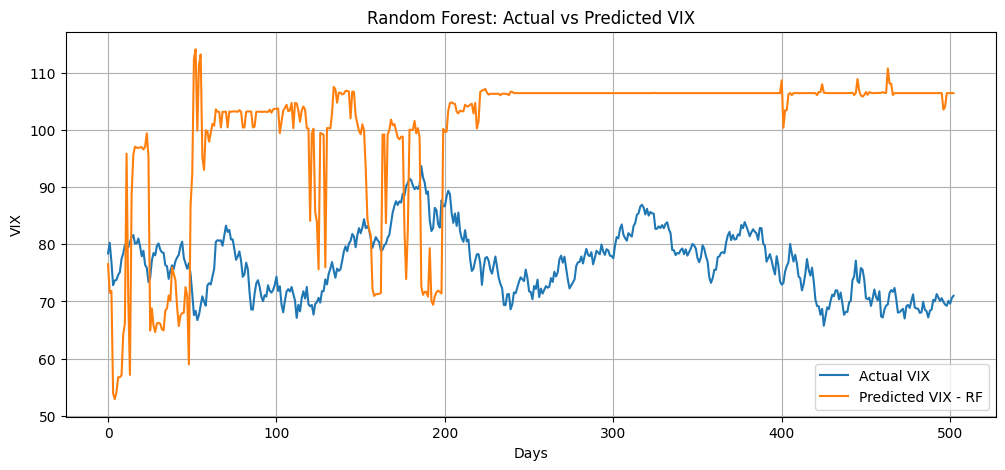

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual VIX')
plt.plot(y_pred_rf, label='Predicted VIX - RF')
plt.title("Random Forest: Actual vs Predicted VIX")
plt.xlabel("Days")
plt.ylabel("VIX")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
df['S&P500_lag1'] = df['S&P500'].shift(1)
df['Gold_lag1'] = df['Gold'].shift(1)
df['Oil_lag1'] = df['Oil'].shift(1)
df['VIX_lag1'] = df['VIX'].shift(1)

df = df.dropna()

X = df[['S&P500_lag1', 'Gold_lag1', 'Oil_lag1', 'VIX_lag1']]
y = df['VIX']  # today's actual VIX

In [22]:
split_index = int(0.8 * len(df))
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Results
RMSE: 1.69
R² Score: 0.91


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Results
RMSE: 1.52
R² Score: 0.93


In [28]:
import pickle

with open('src/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('src/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [27]:
import os
os.makedirs('src', exist_ok=True)


In [30]:
import os
import pickle

os.makedirs('src', exist_ok=True)

with open('src/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('src/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [31]:
import pickle
import os

os.makedirs('src', exist_ok=True)

pickle.dump(rf_model, open('src/rf_model.pkl', 'wb'))

pickle.dump(scaler, open('src/scaler.pkl', 'wb'))


In [32]:
import pickle

pickle.dump(rf_model, open('D:/Projects/-Market-Volatility-VIX-Prediction-/src/rf_model.pkl', 'wb'))
pickle.dump(scaler, open('D:/Projects/-Market-Volatility-VIX-Prediction-/src/scaler.pkl', 'wb'))


In [33]:
import pickle

model_path = r'D:\Projects\-Market-Volatility-VIX-Prediction-\src\rf_model.pkl'
scaler_path = r'D:\Projects\-Market-Volatility-VIX-Prediction-\src\scaler.pkl'

pickle.dump(rf_model, open(model_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
